In [1]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble

!pip install ipython-autotime
%load_ext autotime

clear_output()
print("Done!")

Done!
time: 2.75 ms (started: 2021-05-27 07:32:45 +00:00)


In [2]:
#@title Download the data!
!wget --no-check-certificate 'http://farsiocr.ir/Archive/DigitDB.zip'
!unzip DigitDB.zip

clear_output()
print("Done!")

Done!
time: 3.16 s (started: 2021-05-27 07:33:08 +00:00)


In [3]:
!wget --no-check-certificate 'https://raw.githubusercontent.com/amir-saniyan/HodaDatasetReader/master/HodaDatasetReader.py'

from HodaDatasetReader import read_hoda_cdb
data, y_train = np.array(read_hoda_cdb('Train 60000.cdb'))

clear_output()
print(data.shape)

(60000,)
time: 6.85 s (started: 2021-05-27 07:33:12 +00:00)


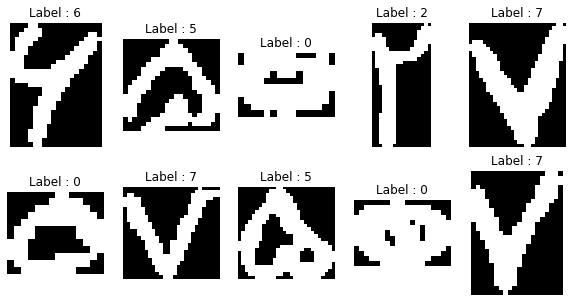

time: 474 ms (started: 2021-05-27 07:33:18 +00:00)


In [4]:
#@title Visualize
fig, ax = plt.subplots(2, 5, figsize=(10,5))

sampled_indices = range(10)
sampled = data[sampled_indices]
sampled_labels = y_train[sampled_indices]

for row in range (2):
  for col in range (5):
    sample = sampled[row*5 + col]
    label = sampled_labels[row*5 + col]
    ax[row][col].imshow(sample, cmap='gray')
    ax[row][col].axis('off')
    ax[row][col].set_title("Label : "+ str(label))
fig.show()

In [5]:
def reshape_images(dataset, size):
  result = []
  for d in dataset:
    height, width = d.shape
    ww = max(height, width)
    pad = np.zeros((ww, ww))
    xx = (ww - width) // 2
    yy = (ww - height) // 2
    pad[yy:yy+height, xx:xx+width] = d
    result.append(cv2.resize(pad, (size, size)))
  return np.array(result)

x, y = data[0].shape
print(x, y)
scaled_data = reshape_images(data, size=28)

27 20
time: 1.06 s (started: 2021-05-27 07:33:19 +00:00)


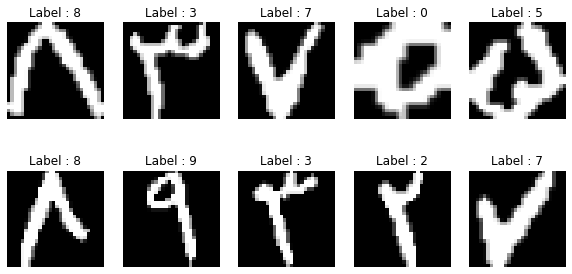

time: 359 ms (started: 2021-05-27 07:33:20 +00:00)


In [6]:
fig, ax = plt.subplots(2, 5, figsize=(10,5))

sampled_indices = np.random.randint(scaled_data.shape[0], size=10)
sampled = scaled_data[sampled_indices]
sampled_labels = y_train[sampled_indices]

for row in range (2):
  for col in range (5):
    sample = sampled[row*5 + col]
    label = sampled_labels[row*5 + col]
    ax[row][col].imshow(sample, cmap='gray')
    ax[row][col].axis('off')
    ax[row][col].set_title("Label : "+ str(label))
fig.show()

In [7]:
X_train = scaled_data.reshape((scaled_data.shape[0], -1))
print ("New dataset shape is ", X_train.shape)
print(len(X_train), len(y_train))
print(X_train[1].shape)

New dataset shape is  (60000, 784)
60000 60000
(784,)
time: 5.69 ms (started: 2021-05-27 07:33:20 +00:00)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


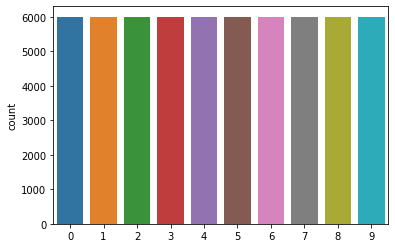

time: 353 ms (started: 2021-05-27 07:33:20 +00:00)


In [8]:
sns.countplot(y_train)

In [9]:
test_data, y_test = np.array(read_hoda_cdb('Test 20000.cdb'))
scaled_test_data = reshape_images(test_data, size=28)
X_test = scaled_test_data.reshape((scaled_test_data.shape[0], -1))

clear_output()
print(y_test.shape)

(20000,)
time: 2.49 s (started: 2021-05-27 07:33:21 +00:00)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


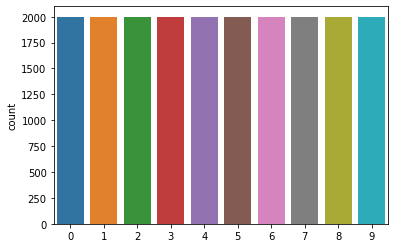

time: 212 ms (started: 2021-05-27 07:33:23 +00:00)


In [10]:
sns.countplot(y_test)

# Decision Tree Classifier

In [19]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train.tolist())
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test.tolist(), y_pred))

0.9088
time: 19.8 s (started: 2021-05-27 07:37:06 +00:00)


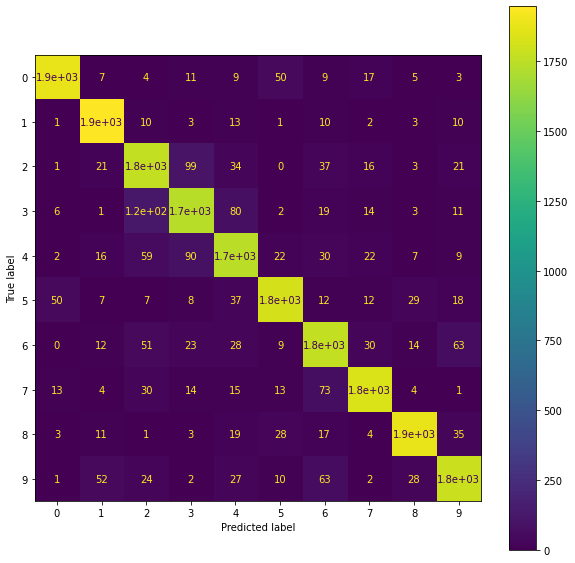

time: 587 ms (started: 2021-05-27 07:46:19 +00:00)


In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(clf, X_test, y_test.tolist(), ax=ax)
plt.show()

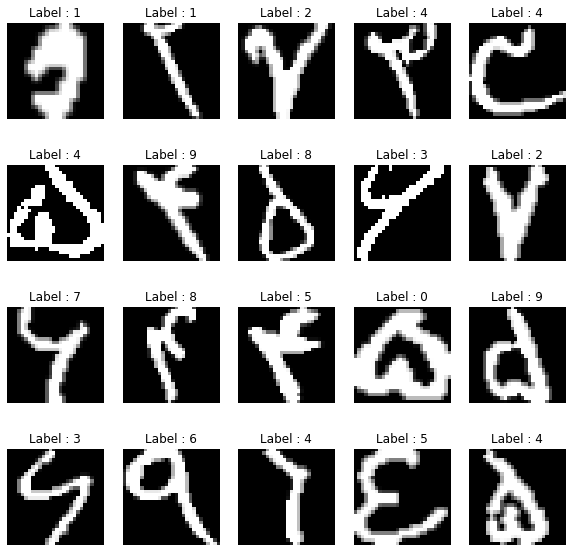

time: 833 ms (started: 2021-05-27 07:52:34 +00:00)


In [36]:
false_pred_index = np.where(y_test.tolist() != y_pred)
false_pred_X = X_test[false_pred_index].reshape((-1, 28, 28))
false_pred_y = y_pred[false_pred_index]

fig, ax = plt.subplots(4, 5, figsize=(10,10))

sampled_indices = np.random.randint(false_pred_X.shape[0], size=20)
sampled = false_pred_X[sampled_indices]
sampled_labels = false_pred_y[sampled_indices]

for row in range (4):
  for col in range (5):
    sample = sampled[row*5 + col]
    label = sampled_labels[row*5 + col]
    ax[row][col].imshow(sample, cmap='gray')
    ax[row][col].axis('off')
    ax[row][col].set_title("Label : "+ str(label))
fig.show()

# Random Forest Classifier

In [37]:
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train.tolist())
y_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test.tolist(), y_pred))

0.97485
time: 40.3 s (started: 2021-05-27 07:57:04 +00:00)


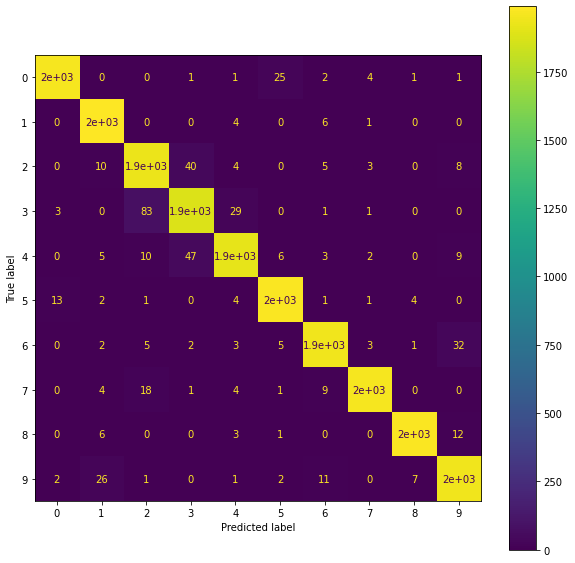

time: 1.25 s (started: 2021-05-27 07:58:34 +00:00)


In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(rf, X_test, y_test.tolist(), ax=ax)
plt.show()

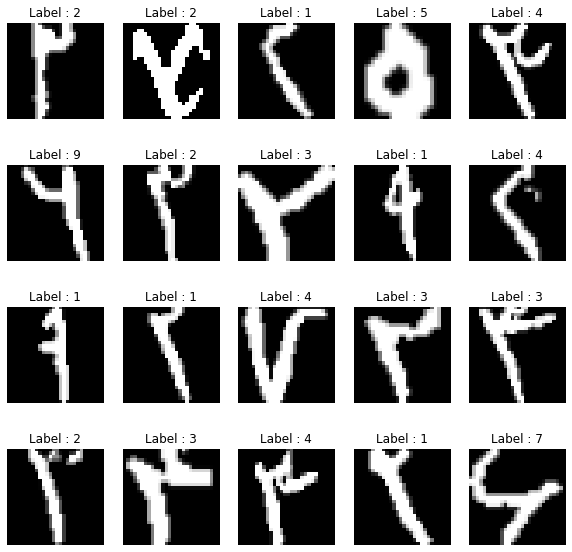

time: 810 ms (started: 2021-05-27 07:59:44 +00:00)


In [40]:
false_pred_index = np.where(y_test.tolist() != y_pred)
false_pred_X = X_test[false_pred_index].reshape((-1, 28, 28))
false_pred_y = y_pred[false_pred_index]

fig, ax = plt.subplots(4, 5, figsize=(10,10))

sampled_indices = np.random.randint(false_pred_X.shape[0], size=20)
sampled = false_pred_X[sampled_indices]
sampled_labels = false_pred_y[sampled_indices]

for row in range (4):
  for col in range (5):
    sample = sampled[row*5 + col]
    label = sampled_labels[row*5 + col]
    ax[row][col].imshow(sample, cmap='gray')
    ax[row][col].axis('off')
    ax[row][col].set_title("Label : "+ str(label))
fig.show()